# 线性代数

In [1]:
import torch

## 1.标量
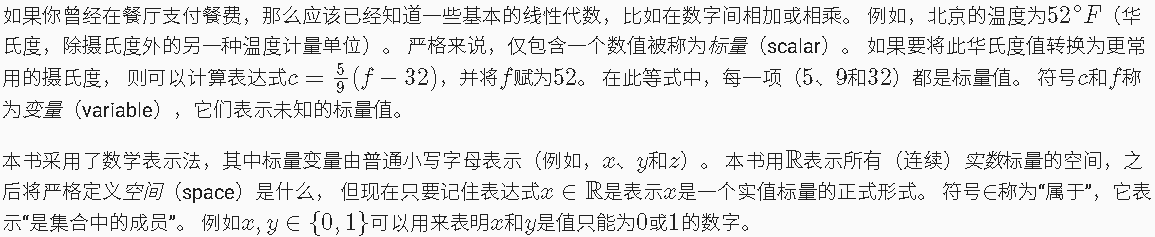

In [2]:
x=torch.tensor(3.0)
y=torch.tensor(4.0)
print(x+y)
print(x-y)
print(x*y)
print(x/y)

tensor(7.)
tensor(-1.)
tensor(12.)
tensor(0.7500)


## 2.向量
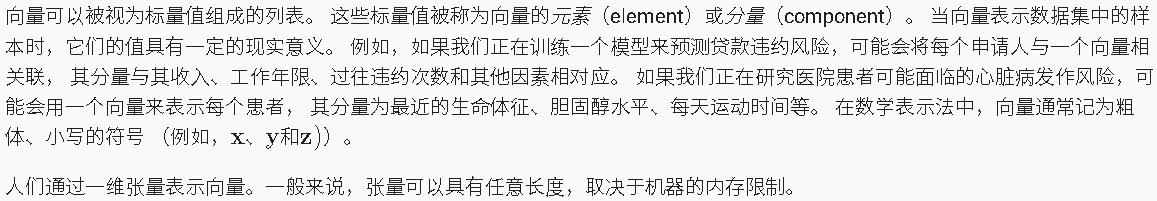
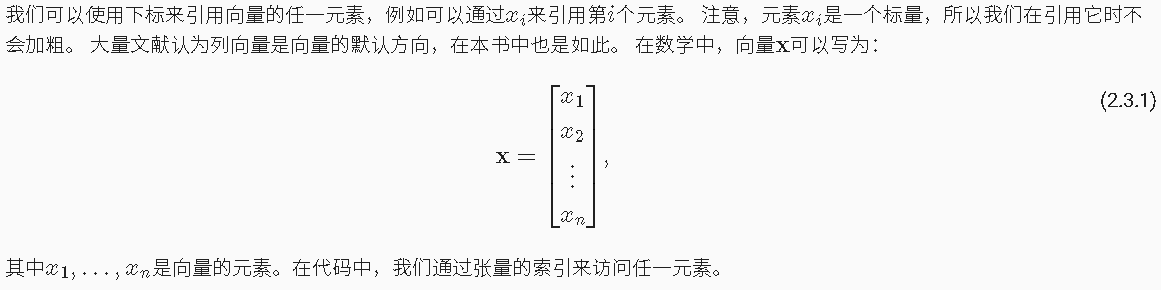

In [4]:
z=torch.arange(6)
print(z)
print(z[3])

tensor([0, 1, 2, 3, 4, 5])
tensor(3)


## 2.长度、维度和形状
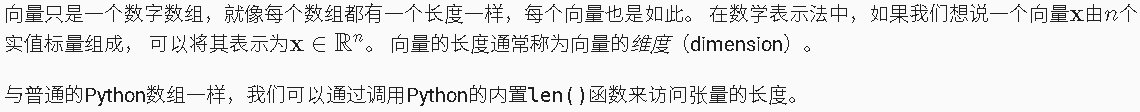

In [5]:
print(len(z))

6


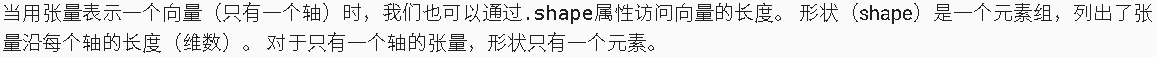

In [6]:
print(z.shape)

torch.Size([6])


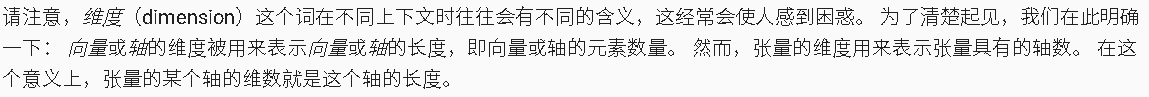

# 3.矩阵
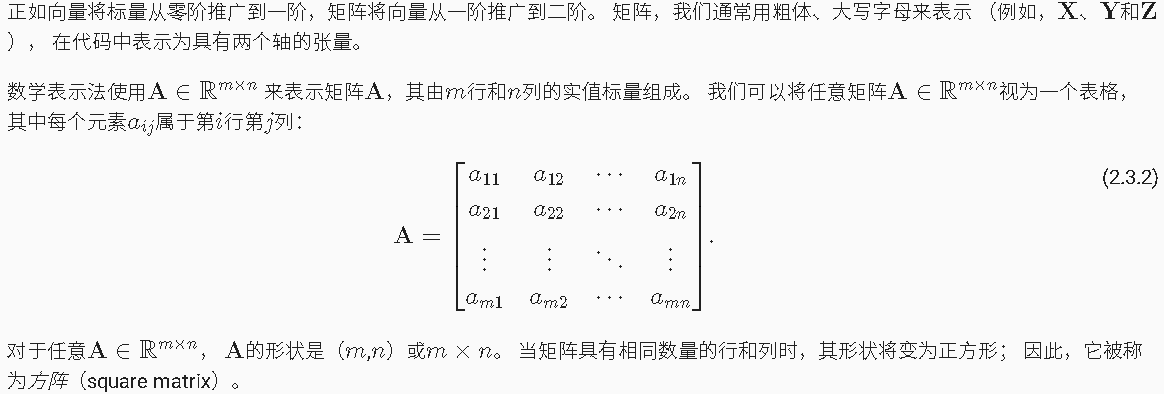
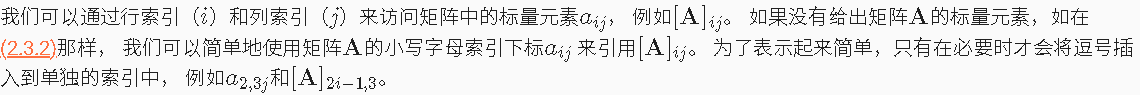

In [8]:
A=torch.arange(20).reshape(5,4)
print(A)
print(A[1][2])

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])
tensor(6)


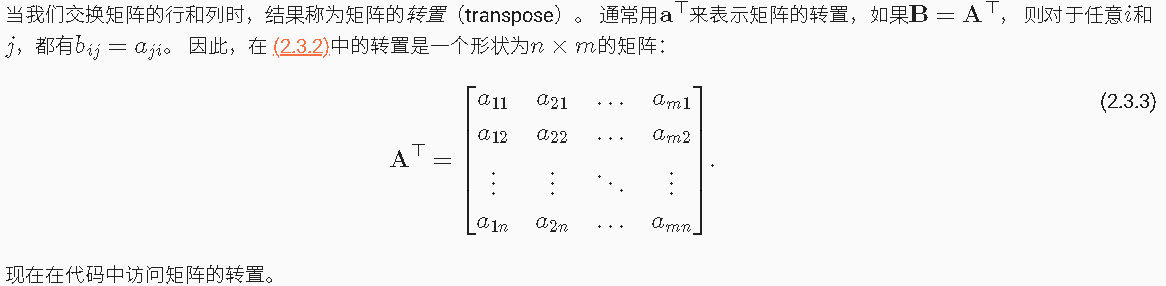
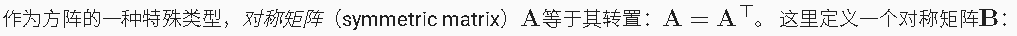

In [14]:
print(A.T)
B=torch.tensor([1,2,3,2,0,4,3,4,5]).reshape(3,3)
print(B)
print(B.T)
print(B==B.T)

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])
tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])
tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


## 4.张量
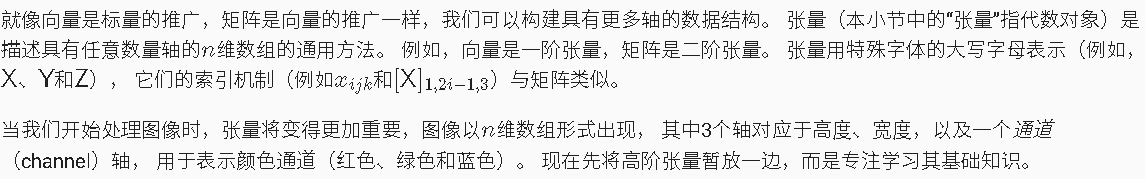

In [15]:
X=torch.arange(24).reshape(2,3,4)
print(X)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])


# 5.张量算法
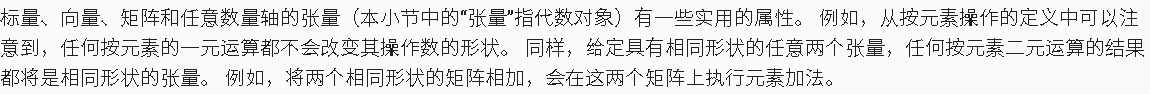

In [17]:
A=torch.arange(20,dtype=torch.float32).reshape(5,4)
B=A.clone()
print(A)
print(A+B)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([[ 0.,  2.,  4.,  6.],
        [ 8., 10., 12., 14.],
        [16., 18., 20., 22.],
        [24., 26., 28., 30.],
        [32., 34., 36., 38.]])


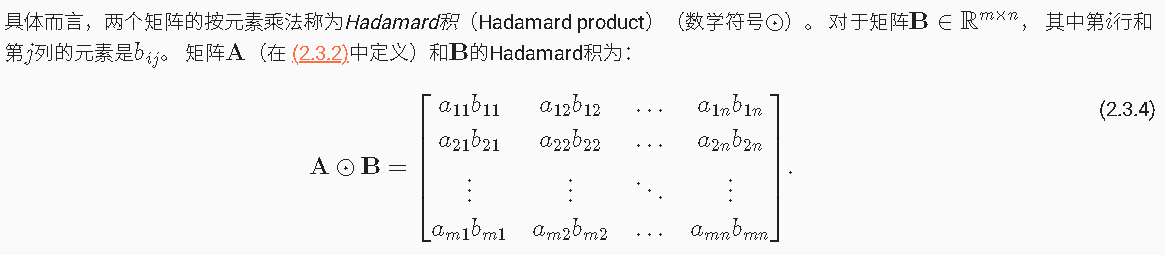

In [21]:
#张量点积
print(A*B)
# 所有元素*6
print(A*6)

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])
tensor([[  0.,   6.,  12.,  18.],
        [ 24.,  30.,  36.,  42.],
        [ 48.,  54.,  60.,  66.],
        [ 72.,  78.,  84.,  90.],
        [ 96., 102., 108., 114.]])


## 6.降维
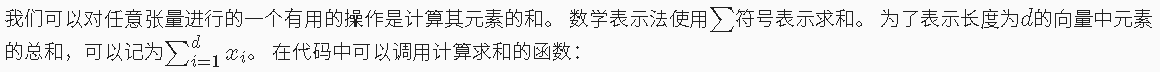

In [23]:
x=torch.arange(6,dtype=torch.float32)
print(x)
# 降维
print(x.sum())

tensor([0., 1., 2., 3., 4., 5.])
tensor(15.)


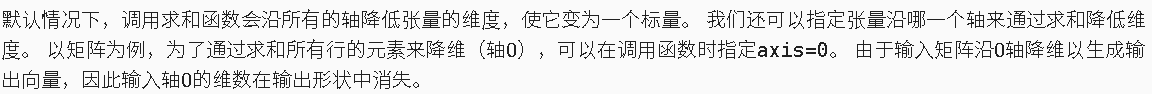

In [28]:
print(A)
#行维度
A_sum_axis0=A.sum(axis=0)
print(A_sum_axis0)
# 列降维
A_sum_axis1=A.sum(axis=1)
print(A_sum_axis1)
# 等价于A.sum()
print(A.sum(axis=[0,1]))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]])
tensor([40., 45., 50., 55.])
tensor([ 6., 22., 38., 54., 70.])
tensor(190.)


In [29]:
print(A.mean())
print(A.sum()/A.numel())

tensor(9.5000)
tensor(9.5000)


同样，计算平均值的函数也可以沿指定轴降低张量的维度。

In [31]:
print(A.mean(axis=0))
print(A.sum(axis=0)/A.shape[0])

tensor([ 8.,  9., 10., 11.])
tensor([ 8.,  9., 10., 11.])


### 6.1 非降维求和


In [32]:
sumA=A.sum(axis=1,keepdims=True)
print(sumA)

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])


In [33]:
# 例如，由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A。
print(A/sumA)

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])


如果我们想沿某个轴计算A元素的累积总和， 比如axis=0（按行计算），可以调用cumsum函数。 此函数不会沿任何轴降低输入张量的维度。

In [34]:
print(A.cumsum(axis=0))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])


## 7.点积
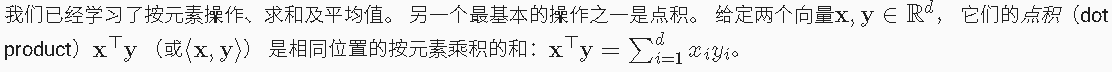

In [2]:
import numpy as np

In [5]:
x=np.ones(4)
y=np.array([1,2,3,4])

# 等价于np.sum(x*y)
print (np.dot(x,y))

10.0


## 8.矩阵-向量积
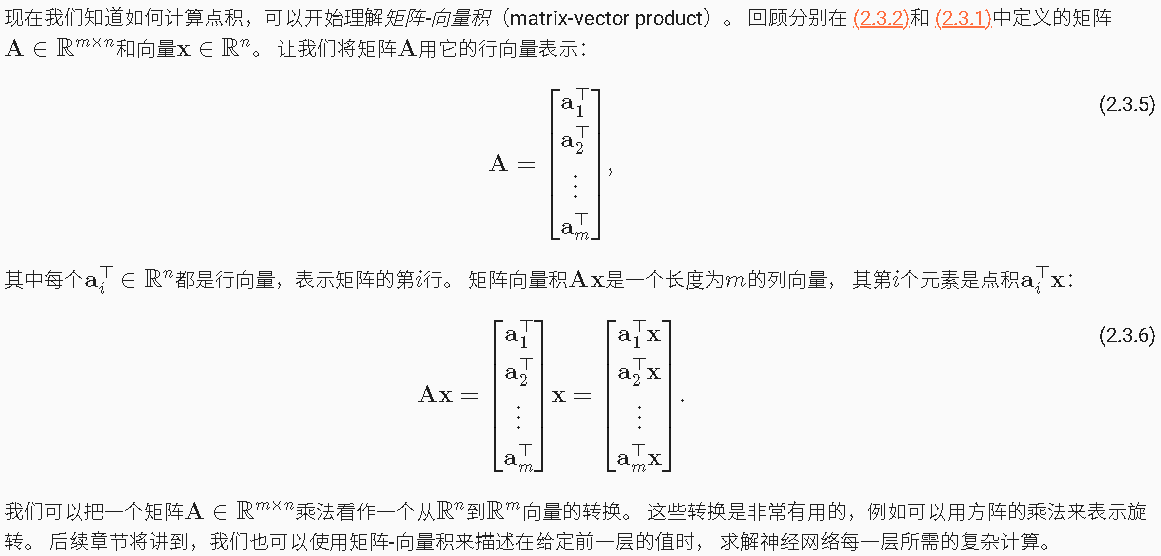

In [6]:
# 在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，
# 会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

A=torch.arange(20).reshape(4,5)
x=torch.arange(5)
# 矩阵向量积
print(A)
print(x)
print(torch.mv(A,x))

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor([0, 1, 2, 3, 4])
tensor([ 30,  80, 130, 180])


## 9.矩阵-矩阵乘法
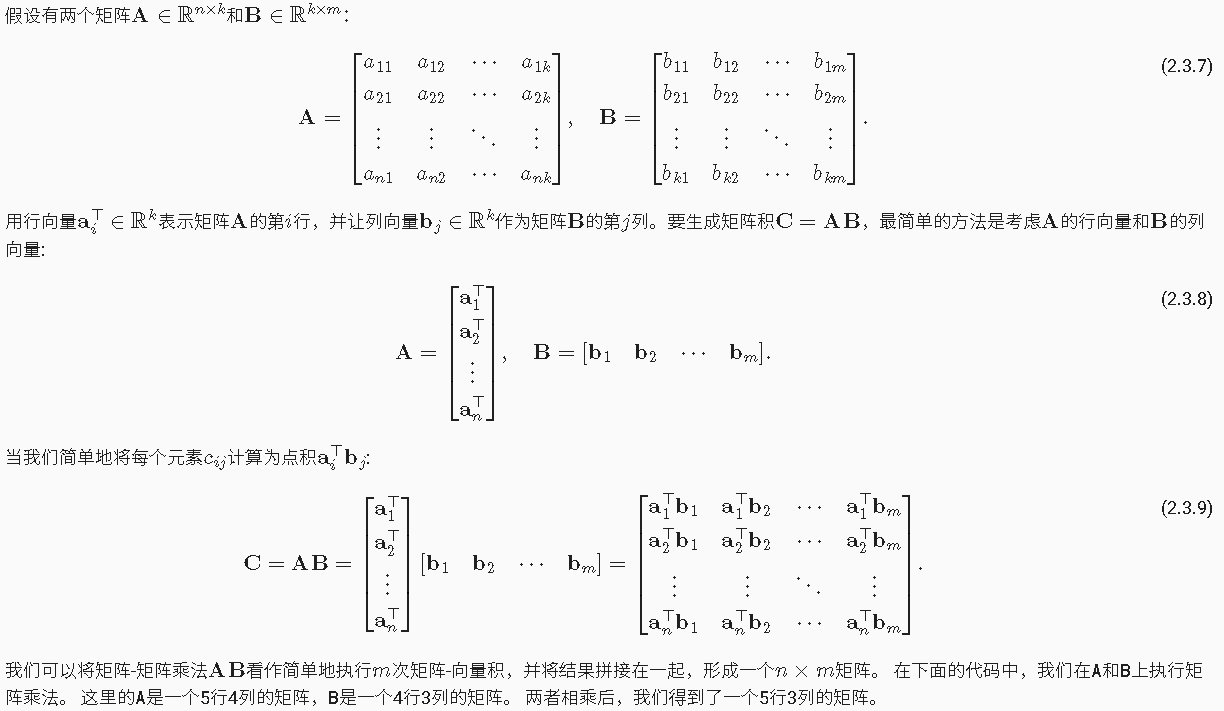

In [7]:
A=torch.arange(9).reshape(3,3)
B=torch.arange(27).reshape(3,9)
print(A)
print(B)
print(torch.mm(A,B))

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 24, 25, 26]])
tensor([[ 45,  48,  51,  54,  57,  60,  63,  66,  69],
        [126, 138, 150, 162, 174, 186, 198, 210, 222],
        [207, 228, 249, 270, 291, 312, 333, 354, 375]])


## 10.范数
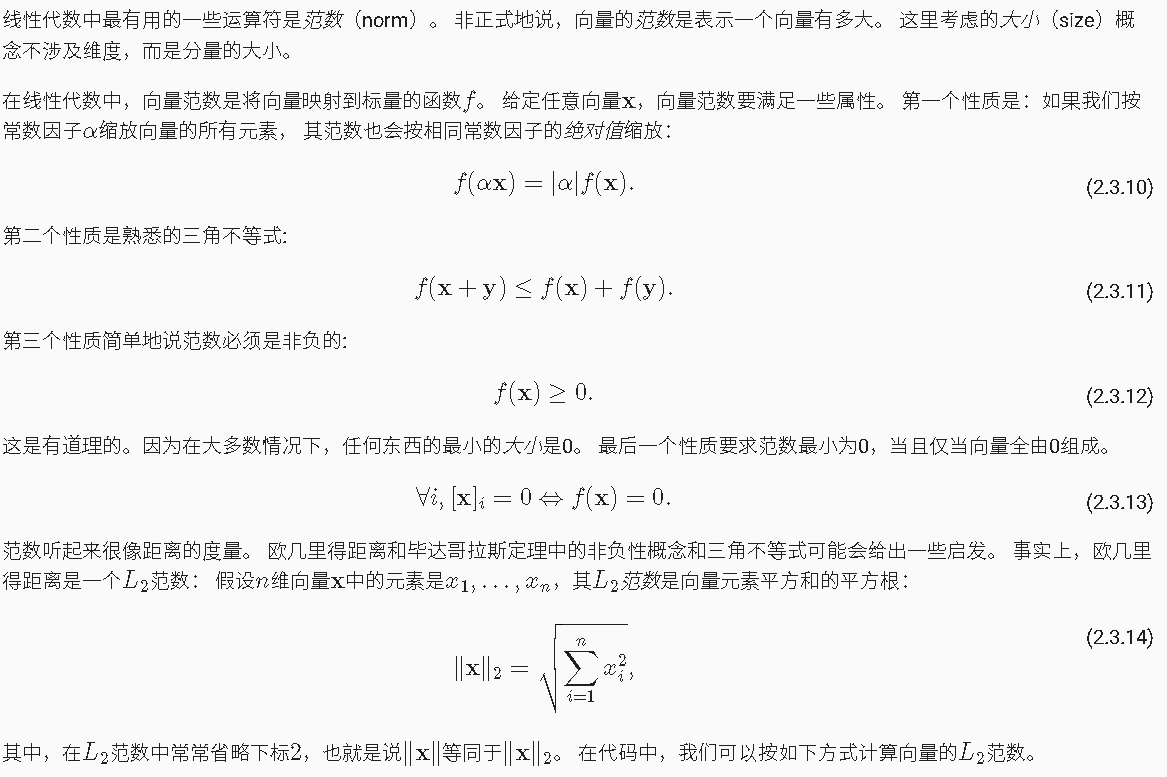

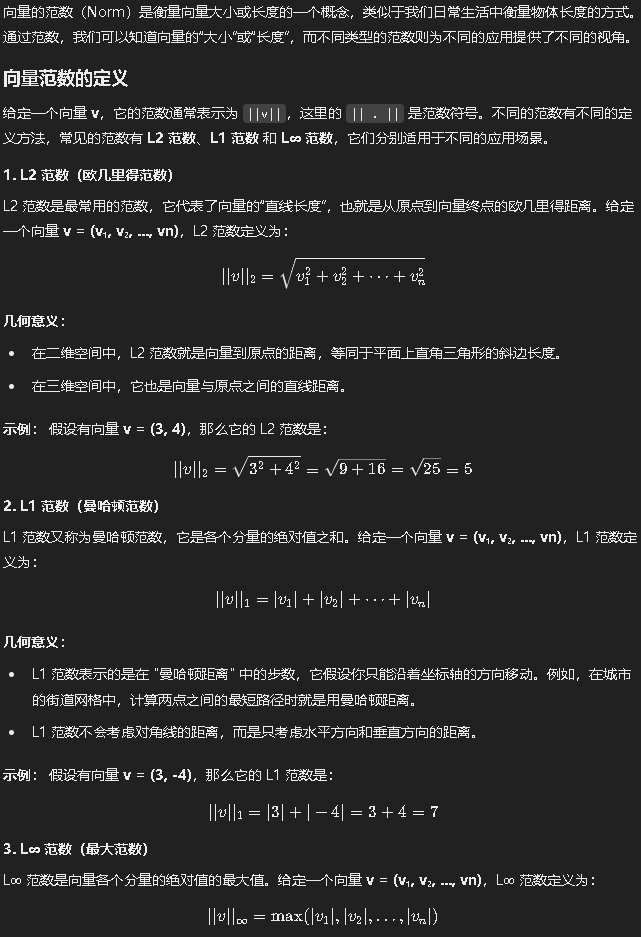
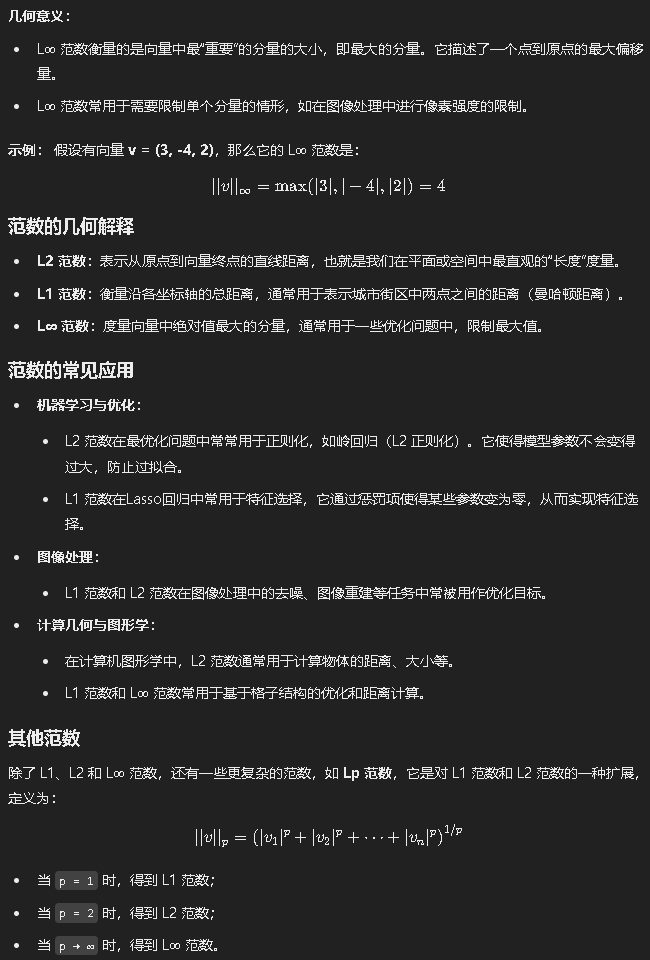

In [13]:
# L2范数
u=torch.tensor([3.0,4.0,5.0])
print(torch.norm(u))

tensor(7.0711)


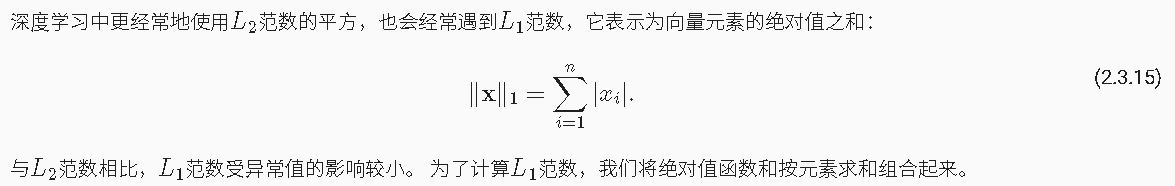

In [14]:
# L1范数
print(torch.abs(u).sum())

tensor(12.)


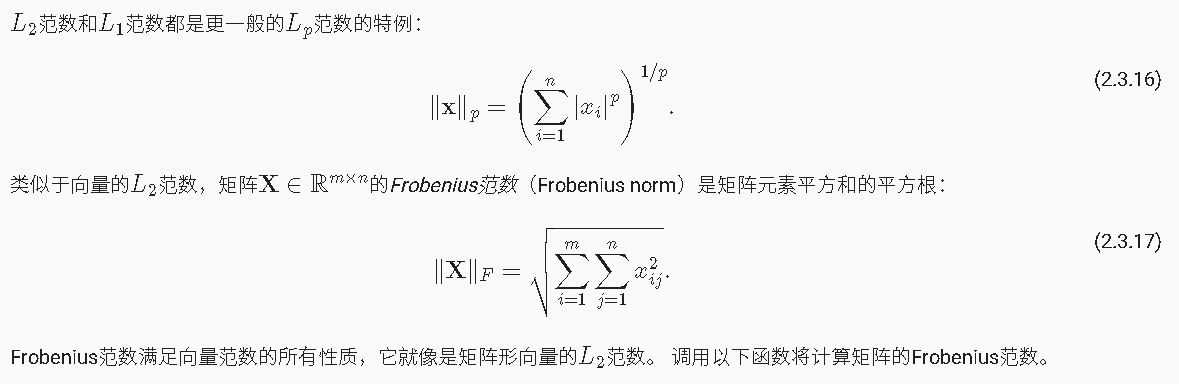

In [16]:
# Frobenius范数
a=torch.ones((4,9))
print(a)
print(torch.norm(a))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1.]])
tensor(6.)


### 10.1 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

## 13.练习
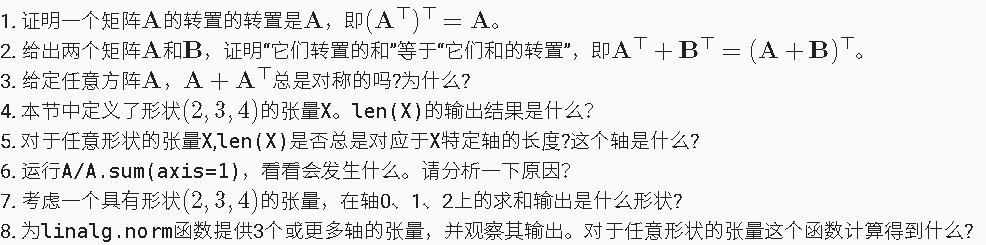

In [18]:
#1
A=torch.arange(9).reshape(3,3)
print(A)
AT=A.T
ATT=AT.T
print(A==ATT)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [20]:
#2
A=torch.arange(9).reshape(3,3)
B=A.clone()
ABT1=A.T+B.T
ABT2=(A+B).T
print(ABT1==ABT2)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [21]:
#3
A=torch.arange(9).reshape(3,3)
AT=A.T
newM=A+AT
print(newM==newM.T)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])


In [24]:
#4
X=torch.arange(24).reshape(2,3,4)
# len(X)返回第一个维度的大小
print(len(X))

2


In [25]:
#5
#对于任意形状的张量 X，在 PyTorch 中使用 len(X) 返回的是张量 X 第一个轴（即第一个维度）的长度。

In [28]:
#6
A=torch.arange(9).reshape(3,3)
print(A)
print(A/A.sum(axis=1))

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[0.0000, 0.0833, 0.0952],
        [1.0000, 0.3333, 0.2381],
        [2.0000, 0.5833, 0.3810]])


In [30]:
X=torch.arange(24).reshape(2,3,4)
print(X)
print(X.sum(axis=0))
print(X.sum(axis=1))
print(X.sum(axis=2))

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])
tensor([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]])
tensor([[12, 15, 18, 21],
        [48, 51, 54, 57]])
tensor([[ 6, 22, 38],
        [54, 70, 86]])


### axis=0 表示对 第一个维度（即每个子张量）进行求和。具体来说，我们在计算时对张量 X 的每个位置（行列位置相同的元素）进行求和，将得到一个新的张量。

对于形状为 (2, 3, 4) 的张量，X.sum(axis=0) 将会对第一个维度（也就是两个子张量）进行求和，输出结果是一个形状为 (3, 4) 的张量，表示每一列的元素在两个子张量中求和的结果。

例如：

第一行第一列的和是 0 + 12 = 12
第一行第二列的和是 1 + 13 = 14
第一行第三列的和是 2 + 14 = 16
第一行第四列的和是 3 + 15 = 18

### axis=1 表示对 第二个维度（即每一行）进行求和。这意味着我们对每个子张量的每一行进行求和，得到一个形状为 (2, 4) 的张量。

对于每个子张量，计算每一行的和：

第一个子张量的第一行和是 0 + 1 + 2 + 3 = 6

第一个子张量的第二行和是 4 + 5 + 6 + 7 = 22

第一个子张量的第三行和是 8 + 9 + 10 + 11 = 38

第二个子张量的第一行和是 12 + 13 + 14 + 15 = 54

第二个子张量的第二行和是 16 + 17 + 18 + 19 = 70

第二个子张量的第三行和是 20 + 21 + 22 + 23 = 86

### axis=2 表示对 第三个维度（即每一列）进行求和。这意味着我们对每一行的 4 个元素进行求和，得到一个形状为 (2, 3) 的张量。

对于每个子张量，计算每行的和：

第一个子张量的第一行和是 0 + 1 + 2 + 3 = 6

第一个子张量的第二行和是 4 + 5 + 6 + 7 = 22

第一个子张量的第三行和是 8 + 9 + 10 + 11 = 38

第二个子张量的第一行和是 12 + 13 + 14 + 15 = 54

第二个子张量的第二行和是 16 + 17 + 18 + 19 = 70

第二个子张量的第三行和是 20 + 21 + 22 + 23 = 86

In [34]:
#7
#所有子标量平方求和再根号
#torch.norm默认计算的是L2范数，即对张量中的所有元素求平方和，然后取平方根
u=torch.arange(24,dtype=torch.float32).reshape(2,3,4)
print(torch.norm(u))

tensor(65.7571)


### 范式计算总结
#### 1.向量范式
1.1 L1范数计算
||x||₁ = |3| + |-4| + |2| 
       = 3 + 4 + 2 
       = 9
1.2 L2范数计算
||x||₂ = √(3² + (-4)² + 2²)
       = √(9 + 16 + 4)
       = √29 
       ≈ 5.385
1.3 L∞范数计算
||x||_∞ = max{|3|, |-4|, |2|}
        = max{3, 4, 2}
        = 4
        
### 2.矩阵范式
设矩阵 A = [1  2]
[-1 3]
2.1Frobenius范数计算
||A||_F = √(1² + 2² + (-1)² + 3²)
        = √(1 + 4 + 1 + 9)
        = √15 
        ≈ 3.873